In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:/Users/ghate/OneDrive/salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_x= df.drop("salary",axis=1)
df_y=df["salary"]

In [5]:
df_x_encoded=pd.get_dummies(df_x,drop_first=True)  #removing categorical values
df_x_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train, x_test, y_train, y_test= train_test_split(df_x_encoded, df_y, test_size=1/3 )

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

d_tree=DecisionTreeClassifier(max_depth=2)
d_tree.fit(x_train, y_train)
train_pred=d_tree.predict(x_train)
test_pred=d_tree.predict(x_test)
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,test_pred)
print('train accuracy',train_acc)
print('test accuracy',test_acc)

train accuracy 0.8293177316073156
test accuracy 0.8260549106320251


In [41]:
best_acc=0

for criterion in['gini','entropy']:
    for max_depth in[2,3]:
        for min_samples_leaf in[5,6]:
            d_tree=DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            d_tree.fit(x_train, y_train)
            test_pred=d_tree.predict(x_test)
            test_acc=accuracy_score(y_test,test_pred)
            if test_acc>best_acc:
                best_parameter=f"criterion:{criterion}, max_depth:{max_depth}, min_samples_leaf:{min_samples_leaf}"
                best_acc=test_acc
            
            

In [42]:
print(best_parameter)
print(best_acc)

criterion:entropy, max_depth:3, min_samples_leaf:5
0.841901603095633


In [43]:
from sklearn.tree import plot_tree

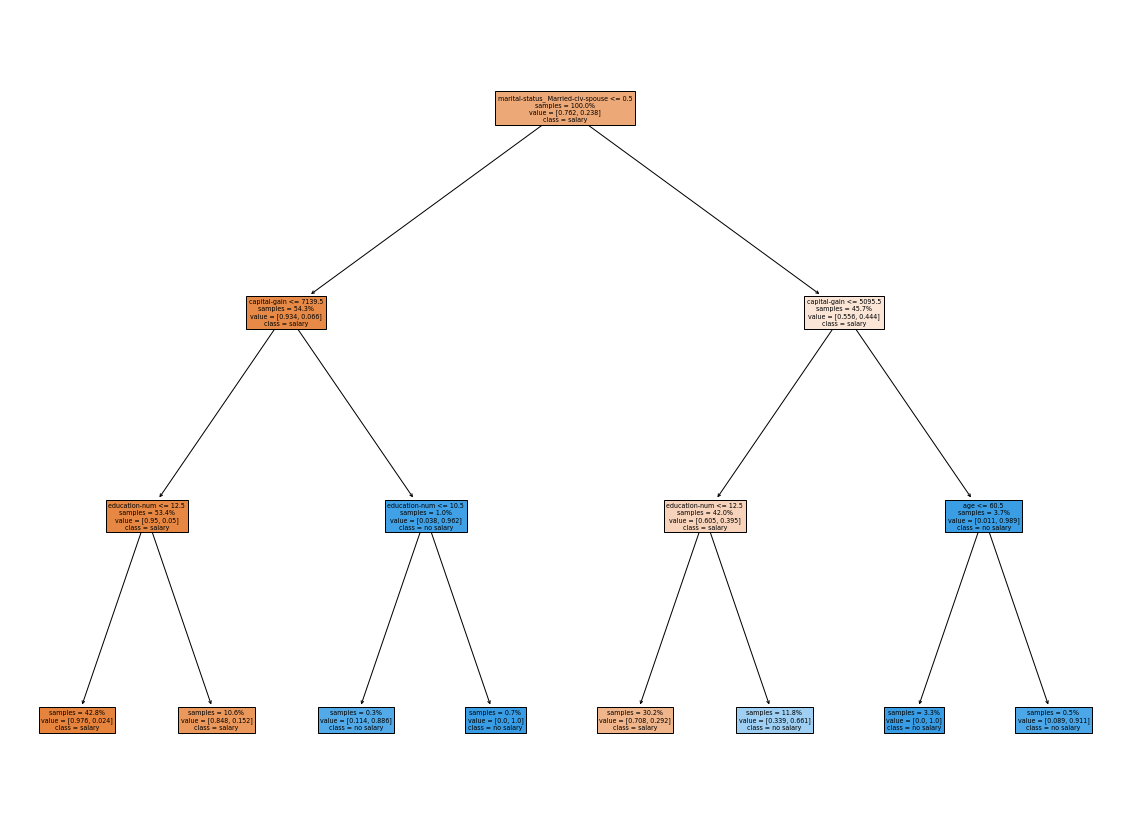

In [44]:
#tree visualization

fig=plt.figure(figsize=((20,15)))
plot_tree(d_tree,
          feature_names=df_x_encoded.columns,
          class_names=['salary','no salary'],
          impurity=False,
          proportion=True,
          filled=True)
fig.savefig('salary_decision_tree.png')